# Principal Component Analysis
Article link : [Dimensionality Reduction: Principal Component Analysis](https://medium.com/@mr.sk12112002/dimensionality-reduction-principal-component-analysis-d990233070e9)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Standardizing the data

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
X,y = df.iloc[:,1:].values,df.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [6]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Constructing the covariance matrix and decomposing it to eigen values and vectors

A covariance matrix is d x d matrix constructed from an n x d dataset where n is the number of instances and d is the number of features present in the dataset. It is made up of the covariances for all pairs of features. It is a symmetric matrix and the diagonal values alone represent the variance. Covariance formula is given below.<br>
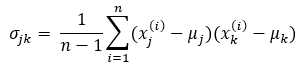

* If the data had been standardized then the mean of the features will be 0. 
* From the covariance, matrix eigen vectors and eigen values are calculated because an eigen vector represents a principal component (the direction of maximum variance) and the corresponding eigen value will define it's magnitude.

In [7]:
X_train_sc.shape

(124, 13)

In [8]:
cov_mat = np.cov(X_train_sc.T)
eigen_vals,eigen_vecs = np.linalg.eig(cov_mat)

In [9]:
cov_mat.shape

(13, 13)

In [10]:
eigen_vals

array([4.68272277, 2.5174937 , 1.44251124, 0.95025687, 0.91388156,
       0.70002767, 0.59696802, 0.09544816, 0.14241154, 0.31659155,
       0.22087117, 0.26741076, 0.25909606])

In [11]:
eigen_vecs.shape

(13, 13)

## Total and explained variance

The **explained variance ratio** of an eigen value i is simply the fraction of the ith eigen value and the sum of all eigen values.<br>
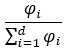

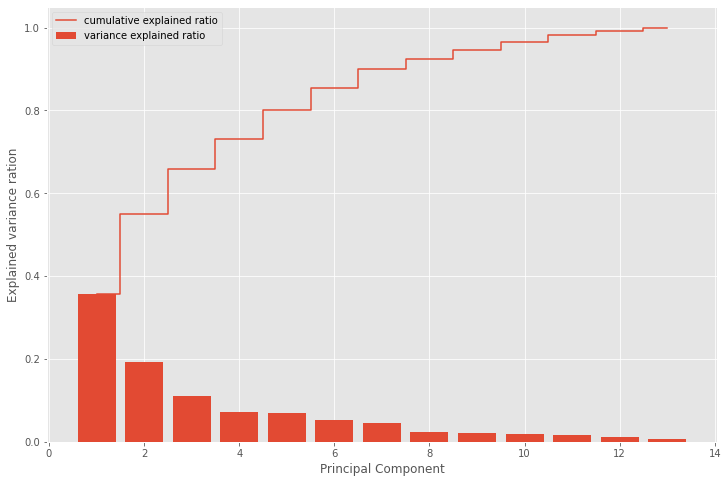

In [12]:
tot = np.sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
%matplotlib inline
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
plt.bar(range(1,14),var_exp,align="center",label="variance explained ratio")
plt.step(range(1,14),cum_var_exp,where="mid",label="cumulative explained ratio")
plt.xlabel("Principal Component")
plt.ylabel("Explained variance ration")
plt.legend()
plt.savefig("fig1.png");

In [13]:
eigen_pairs = [(eigen_vals[i],eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k:k[0],reverse=True)

In [14]:
eigs = np.array(eigen_pairs)
eigs.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(13, 2)

# Converting the higher dimensional data into a lower dimensional one

In [15]:
W = np.c_[eigen_pairs[0][1],eigen_pairs[1][1]]
W.shape

(13, 2)

In [16]:
X_train_sc[0].dot(np.c_[eigen_pairs[0][1],eigen_pairs[1][1]])

array([ 2.18453092, -0.79011876])

In [17]:
X_train_pca = X_train_sc.dot(W)
X_test_pca = X_test_sc.dot(W)

In [18]:
X_train_pca.shape,X_test_pca.shape

((124, 2), (54, 2))

# Plotting decision boundaries

In [19]:
def plot_decision_boundary(classifier,X,y,resolution=0.02,markers=None,colors=None):
    """
    This is a function that is used to visualize the boundaries predicted by classifiers to classify the training data.
    This function only takes uses two features even if more than two are given.
    :param classifier: classifier model that is used to predict the labels
    :param X: training data
    :param y: training label
    :param resolution: resolution of the plot
    :param markers: markers for different classes
    :param colors: colors for different classes
    :return: a figure consisting of the boundaries for each class
    """

    import matplotlib.pyplot as plt
    import seaborn as sns

    if markers==None:
        markers = ['*','s','o']
    if colors==None:
        colors = ['blue','red','orange']

    x_min,x_max = X[:,0].min()-0.1,X[:,0].max()+0.1  # x-axis range
    y_min,y_max = X[:,1].min()-0.1,X[:,1].max()+0.1  # y_axis range

    xx,yy = np.meshgrid(np.arange(x_min,x_max,resolution),
                        np.arange(y_min,y_max,resolution))  # creating a 2x2 array for the figure

    y_unq = np.unique(y)    
    classifier = classifier.fit(X,y)
    Z = classifier.predict(np.c_[np.ravel(xx),np.ravel(yy)])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z)  # the contour plot
    

    for i,j in enumerate(y_unq):
        plt.scatter(X[y==j,0],X[y==j,1],color=colors[i],marker=markers[i],label=j)

    plt.legend()
    plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression

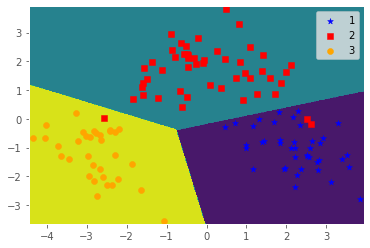

In [21]:
plot_decision_boundary(LogisticRegression(),X_train_pca,y_train)

In [22]:
X_train_pca.shape,y_train.shape

((124, 2), (124,))

# Combining the above concepts into a single class called ```PrCA```

In [24]:
from sklearn.base import TransformerMixin
class PrCA(TransformerMixin):

  def __init__(self,n_components=None):
    self.n_components = n_components # dimension that the data has to be reduced to
  
  def fit(self,X):
    if self.n_components == None: # if the number of components is not mentioned keep the same dimension as the data
      self.n_components = X.shape[1] 
    
    self.cov_mat = np.cov(X.T) # covariance matrix
    eigen_vals,eigen_vecs = np.linalg.eig(self.cov_mat)  # get the eigen values and vectors
    
    # forms a list of tuples in which each tuple has an eigen value and a vector
    self.eigen_pairs = [(eigen_vals[i],eigen_vecs[:,i]) for i in range(len(eigen_vals))]
    self.eigen_pairs.sort(key=lambda k:k[0],reverse=True)   # sorts the list in descending order based on the eigen value
    
    self.W = np.empty(shape=(X.shape[1],self.n_components))
    for i in range(self.n_components):
      self.W[:,i] = self.eigen_pairs[i][1]  # gets the first n_components eigen vectors into the W matrix
    return self

  def transform(self,X):
    return X.dot(self.W)  # transforms a d-dimensional data into n_components-dimensional data.

In [25]:
pc = PrCA(n_components=2)
X_train_p = pc.fit_transform(X_train_sc)

## PrCA x DecisionTreeClassifier on ```mnist``` dataset

In [26]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [27]:
X,y = mnist.data,mnist.target
y = y.astype(int)
X = X/255.

In [28]:
df = pd.DataFrame(data=np.c_[X,y],columns=[f"f_{i}" for i in range(1,X.shape[1]+1)]+["target"])

In [29]:
df.head(5)

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_776,f_777,f_778,f_779,f_780,f_781,f_782,f_783,f_784,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0


In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,stratify=y,random_state=42)

In [31]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.15,stratify=y_train,random_state=42)

In [32]:
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

## using a decision tree to fit on the mnist dataset before PCA has been performed on the data
dtr = DecisionTreeClassifier(max_depth=7)
dtr = dtr.fit(X_train,y_train)
pred = dtr.predict_proba(X_val)
pred = np.argmax(pred,axis=1)
print("No PCA score: ",f1_score(y_val,pred,average="weighted"))

## reducing the number of features from 784 to 200
pc = PrCA(n_components=200)
X_train_p = pc.fit_transform(X_train)
X_val_p = pc.transform(X_val)

## fitting the decision tree on the transformed data
dtr = DecisionTreeClassifier(max_depth=7)
dtr = dtr.fit(X_train_p,y_train)
pred = dtr.predict_proba(X_val_p)
pred = np.argmax(pred,axis=1)
print("PCA score: ",f1_score(y_val,pred,average="weighted"))

No PCA score:  0.7823980861339115
PCA score:  0.7104185416966892
